Exercice 3:  
Le principe du boosting est d’évaluer une séquence de classificateurs faibles (weak learners) 
sur plusieurs versions légèrement modifiées des données d’apprentissage. Les décisions 
obtenues sont alors combinées par une somme pondérée pour obtenir le modèle final. 
Avec scikit-learn, c’est  la  classe AdaBoostClassifier qui implémente cet algorithme. Les 
paramètres les plus importants sont : 
- n_estimators : integer, optional (default=10). Le nombre de classificateurs faibles. 
- learning_rate : contrôle la vitesse de changement des poids par itération. 
- base_estimator : (default=DecisionTreeClassifier) le classificateur faible utilisé.

In [2]:
# Imports
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt 
import pandas
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import ExtraTreeClassifier
import numpy
import tqdm
import seaborn
from sklearn import metrics

In [4]:
digits = load_digits() 
X, y = digits.data, digits.target 
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.90)

In [7]:
clf = AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=5), n_estimators=200, learning_rate=2)
clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_test)
metrics.accuracy_score(Y_test, Y_pred)

0.9035846724351051

1. Le paramètre max_depth contrôle  la  profondeur  de  l’arbre.  Essayez  plusieurs 
valeurs pour voir l’impact de l’utilisation d’un classificateur  faible  vs  plus  fort 
(max_depth élevé ou  éliminer  le  paramètre).  Testez  aussi  l’effet  du 
paramètre learning_rate et le nombre de classificateurs.

max_depth

100%|██████████| 49/49 [00:07<00:00,  6.34it/s]


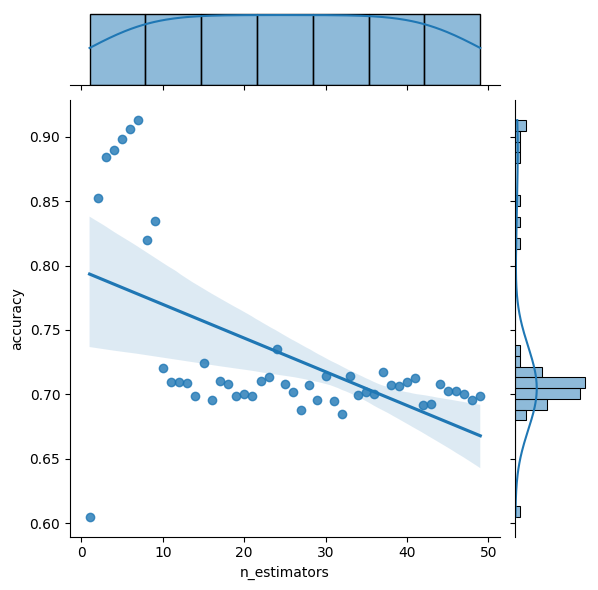

In [11]:
acc_n_esti = []
for i in tqdm.tqdm(numpy.arange(1,50)):
    clf = AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=i), n_estimators=200, learning_rate=2)
    clf.fit(X = X_train, y = Y_train)
    acc_n_esti.append([i,clf.score(X_test,Y_test)])

acc_n_esti = pandas.DataFrame(acc_n_esti, columns=["max_depth", "accuracy"])
seaborn.jointplot(x='max_depth',y='accuracy',data=acc_n_esti,kind='reg')

learning rate

100%|██████████| 49/49 [00:38<00:00,  1.29it/s]


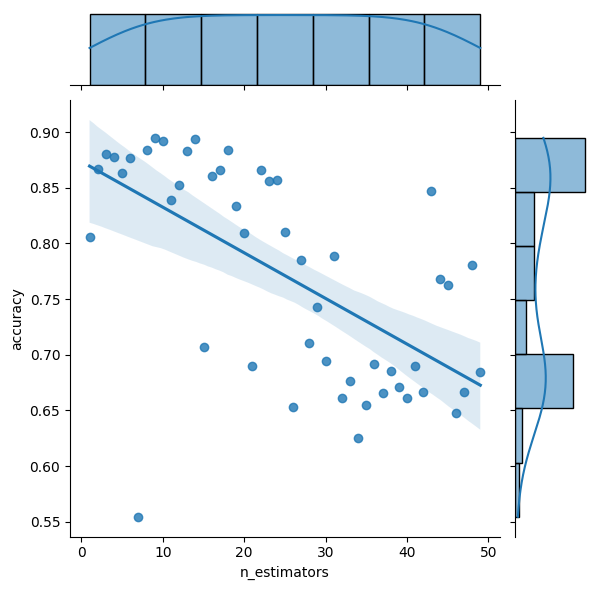

In [12]:
acc_n_esti = []
for i in tqdm.tqdm(numpy.arange(1,50)):
    clf = AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=3), n_estimators=200, learning_rate=i)
    clf.fit(X = X_train, y = Y_train)
    acc_n_esti.append([i,clf.score(X_test,Y_test)])

acc_n_esti = pandas.DataFrame(acc_n_esti, columns=["n_estimators", "accuracy"])
seaborn.jointplot(x='n_estimators',y='accuracy',data=acc_n_esti,kind='reg')

n_estimators

100%|██████████| 499/499 [07:34<00:00,  1.10it/s]


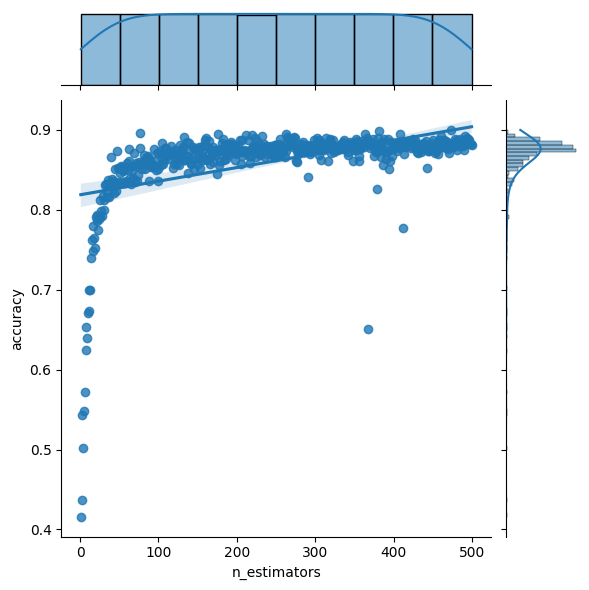

In [13]:
acc_n_esti = []
for i in tqdm.tqdm(numpy.arange(1,500)):
    clf = AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=3), n_estimators=i, learning_rate=2)
    clf.fit(X = X_train, y = Y_train)
    acc_n_esti.append([i,clf.score(X_test,Y_test)])

acc_n_esti = pandas.DataFrame(acc_n_esti, columns=["n_estimators", "accuracy"])
seaborn.jointplot(x='n_estimators',y='accuracy',data=acc_n_esti,kind='reg')